In [8]:
import pandas as pd
import numpy as np

In [9]:
pff_df = pd.read_csv("2021PFFStats.csv")

In [10]:
pff_df.head()

,Team,WINS,LOSSES,WIN PERCENT,PLAYOFFS,OVERALL,OFFENSE,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV,SPEC
0,Arizona Cardinals,11.0,6.0,0.647,1.0,76.5,73.8,82.8,66.3,78.7,68.0,52.2,62.2,49.4,51.3,77.1,58.6,85.8
1,Atlanta Falcons,7.0,10.0,0.412,0.0,69.3,74.4,72.1,52.4,76.5,60.5,80.2,48.8,43.1,44.1,52.3,51.5,82.8
2,Baltimore Ravens,8.0,9.0,0.471,0.0,80.4,75.5,66.0,69.7,72.2,82.5,72.3,62.5,61.1,49.1,70.3,48.6,87.5
3,Buffalo Bills,11.0,6.0,0.647,1.0,89.2,81.2,81.1,69.0,79.4,92.7,58.6,72.0,55.3,57.9,75.6,84.1,88.3
4,Carolina Panthers,5.0,12.0,0.294,0.0,63.1,60.3,49.7,53.9,63.1,72.6,58.8,62.6,52.2,50.5,74.3,62.7,76.3


In [11]:
pff_df.dropna(inplace=True)

In [12]:
pff_df.head()

,Team,WINS,LOSSES,WIN PERCENT,PLAYOFFS,OVERALL,OFFENSE,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV,SPEC
0,Arizona Cardinals,11.0,6.0,0.647,1.0,76.5,73.8,82.8,66.3,78.7,68.0,52.2,62.2,49.4,51.3,77.1,58.6,85.8
1,Atlanta Falcons,7.0,10.0,0.412,0.0,69.3,74.4,72.1,52.4,76.5,60.5,80.2,48.8,43.1,44.1,52.3,51.5,82.8
2,Baltimore Ravens,8.0,9.0,0.471,0.0,80.4,75.5,66.0,69.7,72.2,82.5,72.3,62.5,61.1,49.1,70.3,48.6,87.5
3,Buffalo Bills,11.0,6.0,0.647,1.0,89.2,81.2,81.1,69.0,79.4,92.7,58.6,72.0,55.3,57.9,75.6,84.1,88.3
4,Carolina Panthers,5.0,12.0,0.294,0.0,63.1,60.3,49.7,53.9,63.1,72.6,58.8,62.6,52.2,50.5,74.3,62.7,76.3


In [13]:
pff_df2 = pff_df.drop(columns=["Team", "WINS", "LOSSES", "PLAYOFFS", "OVERALL"])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
pff_df2.head()

,WIN PERCENT,OFFENSE,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV,SPEC
0,0.647,73.8,82.8,66.3,78.7,68.0,52.2,62.2,49.4,51.3,77.1,58.6,85.8
1,0.412,74.4,72.1,52.4,76.5,60.5,80.2,48.8,43.1,44.1,52.3,51.5,82.8
2,0.471,75.5,66.0,69.7,72.2,82.5,72.3,62.5,61.1,49.1,70.3,48.6,87.5
3,0.647,81.2,81.1,69.0,79.4,92.7,58.6,72.0,55.3,57.9,75.6,84.1,88.3
4,0.294,60.3,49.7,53.9,63.1,72.6,58.8,62.6,52.2,50.5,74.3,62.7,76.3


In [16]:
y = pff_df2["WIN PERCENT"]
X = pff_df2.drop(columns=["WIN PERCENT"])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [18]:
scaler = StandardScaler()

In [19]:
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor()

In [22]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([0.5627 , 0.68252, 0.50929, 0.62746, 0.32285, 0.53868, 0.70432,
       0.47399])

In [25]:
model.score(X,y)

0.9222451161836539

In [26]:
importances_names = model.feature_names_in_

In [27]:
importances=model.feature_importances_

In [28]:
importances_df = pd.DataFrame(importances,importances_names)

In [34]:
importances_df.sort_values(by=0, ascending=False)

,0
PASS,0.283950
COV,0.194117
DEF,0.176113
OFFENSE,0.099332
RECV,0.078106
RDEF,0.070026
PRSH,0.033320
PBLK,0.022453
RBLK,0.015440
TACK,0.011949


<AxesSubplot:>

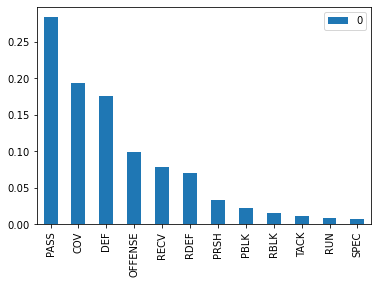

In [30]:
importances_df.sort_values(by = 0, ascending=False).plot(kind = "bar")

In [40]:
# Imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from matplotlib import cm

In [41]:
importances_df = pd.DataFrame({"feature_importances": importances, "feature_name": importances_names})

In [42]:
importances_df

,feature_importances,feature_name
0,0.099332,OFFENSE
1,0.283950,PASS
2,0.022453,PBLK
3,0.078106,RECV
4,0.008549,RUN
5,0.015440,RBLK
6,0.176113,DEF
7,0.070026,RDEF
8,0.011949,TACK
9,0.033320,PRSH


In [46]:
importances_df = importances_df.sort_values(by="feature_importances", ascending=True)

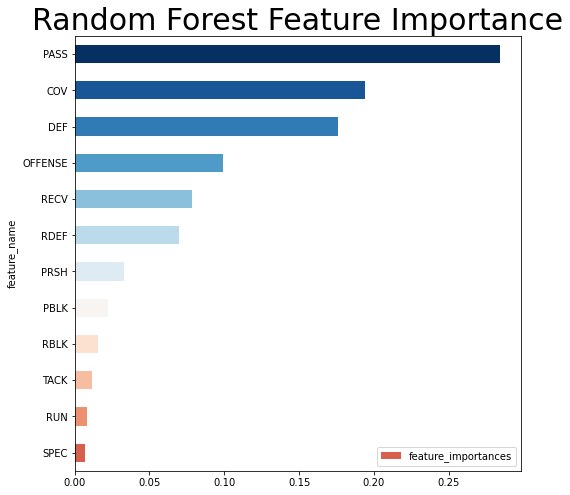

In [50]:
# Plot feature importance as vertical bar chart with a diverging color palette
colors = cm.RdBu(np.linspace(.2, 1, importances_df.shape[0]))

importances_df.plot.barh(
    x="feature_name", 
    y='feature_importances', 
    figsize=(8,8), 
    title="Random Forest Feature Importance",
    color=colors).title.set_size(30)